> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate Medical Appointment No Shows Dataset
 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>The dataset that I have selected is a no show appointment dataset which has a dependent variable which is the case of the patient showing for their appointment and is presented in the dataset as no for people who have shown for their appointment and yes for people who hasn't shown for their appointments there are many independent variables like gender, age, scheduled day, the patient medical conditions and whether the patient received a notification or not 
The questions are What factors are important in order to predict if a patient will show up for their scheduled appointment?
Age, Gender, Medical Conditions, Scholarship,Appointment and Schedulled day 



In [190]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np

import pandas as pd 

import matplotlib.pyplot as plt 

%matplotlib inline 

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling ِAnd Cleaning

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [191]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
noshow_df=pd.read_csv('noshowappointments.csv')
noshow_df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


### Get to know dataset shape 

In [192]:
noshow_df.shape



(110527, 14)

### Get Description for every numerical variable to spot irregularities

In [193]:
noshow_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Get all data which has age less than 0

In [194]:
age_index=noshow_df.loc[noshow_df['Age']<0].index


### Remove data with age less than 0

In [195]:
noshow_df.drop(age_index,axis=0,inplace=True)

### Drop unused columns 

In [196]:
noshow_df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

### Checking for Null value 

In [197]:
noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110526 non-null  object
 1   ScheduledDay    110526 non-null  object
 2   AppointmentDay  110526 non-null  object
 3   Age             110526 non-null  int64 
 4   Neighbourhood   110526 non-null  object
 5   Scholarship     110526 non-null  int64 
 6   Hipertension    110526 non-null  int64 
 7   Diabetes        110526 non-null  int64 
 8   Alcoholism      110526 non-null  int64 
 9   Handcap         110526 non-null  int64 
 10  SMS_received    110526 non-null  int64 
 11  No-show         110526 non-null  object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


### Change ScheduledDay AppointmentDay To Date and Time Format

In [198]:
noshow_df['ScheduledDay']=pd.to_datetime(noshow_df['ScheduledDay'])

In [199]:
noshow_df['AppointmentDay']=pd.to_datetime(noshow_df['AppointmentDay'])

 ### Create Month and Day Name columns 

In [200]:
noshow_df['ScheduledDayName']=noshow_df['ScheduledDay'].dt.day_name()

In [201]:
noshow_df['AppointmentDayName']=noshow_df['AppointmentDay'].dt.day_name()

In [202]:
noshow_df['ScheduledDayMonth']=noshow_df['ScheduledDay'].dt.month

In [203]:
noshow_df['AppointmentDayMonth']=noshow_df['AppointmentDay'].dt.month

### Create Waiting Interval column 

In [204]:
noshow_df['Waiting_Interval']=noshow_df['AppointmentDay']-noshow_df['ScheduledDay']

In [205]:
noshow_df['Waiting_Interval']=noshow_df['Waiting_Interval'].dt.days

In [206]:
noshow_df['Waiting_Interval'].unique() # we are using only days because appointment has no hour attribute in dataset

array([ -1,   1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,
        27,  23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,
        45,  38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,
        83,  77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,
        48,  72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,
         7,   4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,
        76,  68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  -2,
        79,  85,  97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,
        89, 150, 125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121,
       100, 104,  91,  96,  92, 106,  94,  -7, 138, 131, 178, 116, 145,
       122], dtype=int64)

### Remove Negative waiting days because its not possible 

In [207]:
Negative_waiting_days=noshow_df.loc[noshow_df['Waiting_Interval']<0].index

In [208]:
noshow_df.drop(Negative_waiting_days,axis=0,inplace=True)

In [209]:
#check for negative values again 
noshow_df['Waiting_Interval'].unique()

array([  1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,
        23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,  45,
        38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,  83,
        77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,  48,
        72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,   7,
         4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,  76,
        68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  79,  85,
        97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89, 150,
       125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121, 100, 104,
        91,  96,  92, 106,  94, 138, 131, 178, 116, 145, 122], dtype=int64)

### Get Unique Values for evey Independent  feature 

In [210]:
noshow_df.columns.values

array(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'ScheduledDayName',
       'AppointmentDayName', 'ScheduledDayMonth', 'AppointmentDayMonth',
       'Waiting_Interval'], dtype=object)

In [211]:
noshow_df.Gender.unique()

array(['F', 'M'], dtype=object)

In [212]:
noshow_df.ScheduledDay.dt.day.unique()

array([27, 26, 28, 25, 20, 31, 19,  6, 18, 11, 12, 15,  1,  5,  8, 14, 13,
        7, 17, 30, 29,  4, 21, 23, 22, 16, 10, 24,  2,  3,  9],
      dtype=int64)

In [213]:
noshow_df.ScheduledDay.dt.month.unique()

array([ 4,  3,  2,  1,  5, 11, 12,  6], dtype=int64)

In [214]:
noshow_df.ScheduledDay.dt.hour.unique()

array([ 8, 15, 12, 14, 11, 10,  9,  7, 13, 17, 18, 16, 19, 20,  6, 21],
      dtype=int64)

In [215]:
noshow_df.AppointmentDay.dt.day.unique()

array([29,  3, 10, 17, 31, 24,  2, 16, 19,  6, 20,  5, 30, 12, 13,  9,  4,
       25, 11, 18, 14,  7,  1,  8], dtype=int64)

In [216]:
noshow_df.AppointmentDay.dt.month.unique()

array([4, 5, 6], dtype=int64)

In [217]:
noshow_df.AppointmentDay.dt.hour.unique()

array([0], dtype=int64)

In [218]:
noshow_df.Age.unique()

array([ 76,  23,  39,  19,  30,  29,  22,  28,  54,  15,  50,  40,   4,
        13,  46,  12,  38,  85,  55,  71,  78,  31,  58,  27,   8,   2,
         3,   0,  69,  62,  68,  64,  60,  21,  67,  49,  10,   1,  11,
        35,  51,  20,  26,  34,  56,  59,  18,  33,  16,  36,  42,  47,
        17,  41,   5,  45,  44,  37,  24,  32,   6,  66,  63,  75,  52,
        74,  53,  65,  57,  14,   9,  43,   7,  70,  72,  48,  87,  25,
        83,  77,  61,  88,  89,  79,  73,  80,  84,  82,  94,  86,  91,
        98,  81,  92,  90,  96,  93,  95,  97, 115, 100, 102], dtype=int64)

In [219]:
noshow_df.Neighbourhood.unique()

array(['REPÚBLICA', 'GOIABEIRAS', 'CONQUISTA', 'NOVA PALESTINA',
       'SÃO CRISTÓVÃO', 'TABUAZEIRO', 'MARUÍPE', 'GRANDE VITÓRIA',
       'SÃO BENEDITO', 'ILHA DAS CAIEIRAS', 'JARDIM DA PENHA',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'MARIA ORTIZ', 'JABOUR',
       'ANTÔNIO HONÓRIO', 'RESISTÊNCIA', 'ILHA DE SANTA MARIA',
       'JUCUTUQUARA', 'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA',
       'PRAIA DO SUÁ', 'DA PENHA', 'ITARARÉ', 'ANDORINHAS', 'SÃO PEDRO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTOS DUMONT', 'CARATOÍRA',
       'ARIOVALDO FAVALESSA', 'UNIVERSITÁRIO', 'SANTA MARTHA',
       'JOANA D´ARC', 'CONSOLAÇÃO', 'JARDIM CAMBURI', 'BOA VISTA',
       'MORADA DE CAMBURI', 'CENTRO', 'PARQUE MOSCOSO', 'SANTA CLARA',
       'DO MOSCOSO', 'SANTA LUÍZA', 'PRAIA DO CANTO', 'SANTA LÚCIA',
       'BARRO VERMELHO', 'BENTO FERREIRA', 'ESTRELINHA', 'FORTE SÃO JOÃO',
       'FONTE GRANDE', 'ENSEADA DO SUÁ', 'SANTOS REIS', 'PIEDADE',
       'JESUS DE NAZARETH', 'SANTA TEREZA', 'GURIGI

In [220]:
noshow_df.Scholarship.unique()

array([0, 1], dtype=int64)

In [221]:
noshow_df.Hipertension.unique()

array([1, 0], dtype=int64)

In [222]:
noshow_df.Diabetes.unique()

array([0, 1], dtype=int64)

In [223]:
noshow_df.Alcoholism.unique()

array([0, 1], dtype=int64)

In [224]:
noshow_df.Handcap.unique() # As stated by the dataset creator the handcap number represents number of disabilities someone has

array([0, 1, 2, 3, 4], dtype=int64)

In [225]:
noshow_df.SMS_received.unique()

array([0, 1], dtype=int64)

### Values of dependent feature

In [226]:
noshow_df.rename(columns={'No-show':'Noshow'},inplace=True)
##rename the No-show feature because it cause error because of (-) used in name 

noshow_df.Noshow.unique()

array(['No', 'Yes'], dtype=object)

### Visualize Data

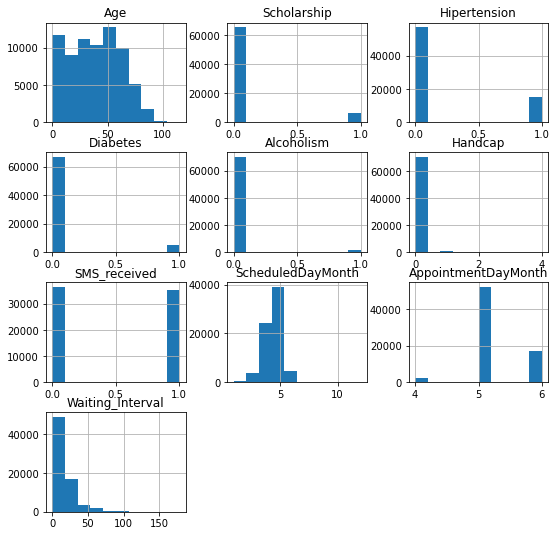

In [227]:
noshow_df.hist(figsize=(9,9));

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What factors are important  in order to predict if a patient will show up for their scheduled appointment?

#### Function Used in getting relation between dependent and independent variable

In [279]:
def Relation(var1,condition1,var2,condition2,condition3):
    Show=noshow_df[(var1==condition1) & (var2==condition2)].Noshow.count()/noshow_df[(var2==condition2)].Noshow.count()

    NO_Show=noshow_df[(var1==condition1) & (var2==condition3)].Noshow.count()/noshow_df[(var2==condition3)].Noshow.count()
    
    return Show,NO_Show

Diabetes,No_Diabetes=Relation(noshow_df.Noshow,'Yes',noshow_df.Diabetes,1,0)

print(Diabetes)


                     

0.24958155105077182


### 1) Age Factor 

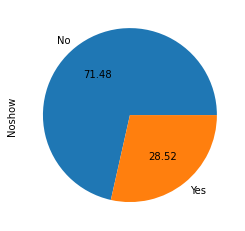

In [250]:
noshow_df['Noshow'].value_counts().plot(kind='pie',autopct='%.2f',figsize=(4,4));


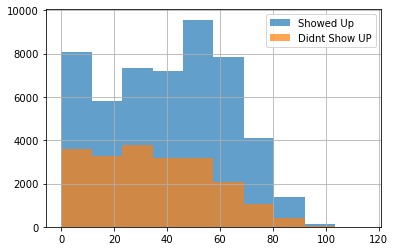

In [231]:
noshow_df.Age[noshow_df['Noshow']=='No'].hist(alpha=0.7,label='Showed Up');
noshow_df.Age[noshow_df['Noshow']=='Yes'].hist(alpha=0.7,label="Didnt Show UP");
## the only clear diffrence is that most people that show up are at age 60 and least are at age >80 but the number of people
## above 80 is low to be used to get a result 

plt.legend() ;

### 2) Gender

In [272]:
Show_Female=noshow_df.query("Noshow=='No' & Gender=='F'").Noshow.count()/noshow_df.query("Gender=='F'").Noshow.count()

NO_Show_Female=noshow_df.query("Noshow=='Yes' & Gender=='F'").Noshow.count()/noshow_df.query("Gender=='F'").Noshow.count()


Show_Male=noshow_df.query("Noshow=='No' & Gender=='M'").Noshow.count()/noshow_df.query("Gender=='M'").Noshow.count()

NO_Show_Male=noshow_df.query("Noshow=='Yes' & Gender=='M'").Noshow.count()/noshow_df.query("Gender=='M'").Noshow.count()

Gender_Count=noshow_df.Gender.value_counts()
Noshow_Count=noshow_df.Noshow.value_counts()
print(Gender_Count,"\n")
print(Noshow_Count,"\n")

print("Percent of Female that has shown for their appointment  ",Show_Female,"\n")
print("Percent of Male that has shown for their appointment    ",Show_Male,"\n")
print("Percent of Female that didn't show for their appointment",NO_Show_Female,"\n")
print("Percent of Male that didn't show for their appointment  ",NO_Show_Male,"\n")


## Its clear that Gender doesnt affect people showing up for their appointment

F    48070
M    23889
Name: Gender, dtype: int64 

No     51437
Yes    20522
Name: Noshow, dtype: int64 

Percent of Female that has shown for their appointment   0.7155398377366341 

Percent of Male that has shown for their appointment     0.7133408681820085 

Percent of Female that didn't show for their appointment 0.2844601622633659 

Percent of Male that didn't show for their appointment   0.2866591318179915 



### 3) Medical Conditions 

In [280]:
## Diabetes 

Diabetes,No_Diabetes=Relation(noshow_df.Noshow,'Yes',noshow_df.Diabetes,1,0)



Diabetes_Count=noshow_df.Diabetes.value_counts()
print("Percentage of People that didnt show that have diabetes relative to all people that have diabetes", Diabetes)
print("Percentage of People that didnt show that have no diabetes relative to all people that have no diabetes",No_Diabetes)
print(Diabetes_Count)

Percentage of People that didnt show that have diabetes relative to all people that have diabetes 0.24958155105077182
Percentage of People that didnt show that have no diabetes relative to all people that have no diabetes 0.2880658436213992
0    66582
1     5377
Name: Diabetes, dtype: int64


### Note
given that percentage of people that didn't show for their appointment is 28 percent  percentage of people that 
percentage of people that have diabetes that didn't show is 24 percent of all people that have diabetes 
while people that has no diabetes that doesnt show represent 28 percent 
so we can deduce that people that has diabetes tend to attend more appointments

In [285]:
##Alcoholism
Alcoholism,No_Alcoholism=Relation(noshow_df.Noshow,'Yes',noshow_df.Alcoholism,1,0)




Alcoholism_Count=noshow_df.Alcoholism.value_counts()
print(Alcoholism)
print(No_Alcoholism)
print(Alcoholism_Count)

0.340834248079034
0.2837446711436189
0    70137
1     1822
Name: Alcoholism, dtype: int64


### Note
given that percentage of people that didn't show for their appointment is 28 percent  percentage of people that 
percentage of people that have Alcoholism that didn't show is 34 percent of all people that have diabetes 
while people that has no Alcoholism that doesnt show represent 28 percent 
so we can deduce that people that has Alcoholism tend to miss more appointments

In [284]:
##Hipertension #there is a typo
Hypertension,No_Hypertension=Relation(noshow_df.Noshow,'Yes',noshow_df.Hipertension,1,0)



Hypertension_Count=noshow_df.Hipertension.value_counts()


print(Hypertension)
print(No_Hypertension)
print(Hypertension_Count)

0.23523150612027674
0.2983821385282906
0    56927
1    15032
Name: Hipertension, dtype: int64


### Note
given that percentage of people that didn't show for their appointment is 28 percent  percentage of people that 
percentage of people that have Hypertension that didn't show is 23 percent of all people that have Hypertension
while people that has no Hypertension that doesnt show represent 29 percent 
so we can deduce that people that has Hypertension tend to attend more appointments 
and who has no Hypertension tend to miss more but on a  very small scale 

In [236]:
##Handcap
Handcap=noshow_df.query("Noshow=='Yes' & Handcap>1").Noshow.count()/noshow_df.query("Handcap>1").Noshow.count()

No_Handcap=noshow_df.query("Noshow=='Yes' & Handcap==0").Noshow.count()/noshow_df.query("Handcap==0").Noshow.count()


Handcap_Count=noshow_df.Handcap.value_counts()


print(Handcap)
print(No_Handcap)
print(Handcap_Count)


0.30327868852459017
0.2857385495102757
0    70652
1     1185
2      112
3        8
4        2
Name: Handcap, dtype: int64


### Note
given that percentage of people that didn't show for their appointment is 28 percent  percentage of people that 
percentage of people that have Handcap that didn't show is 30 percent of all people that have Handcap
while people that has no Handcap that doesnt show represent 28 percent 
so we can deduce that people that has Handcap tend to miss more appointments but dataset of handcap people is so small 
to be used as an indication 


### 4)Scholarship

In [283]:
##Scholarship 
Scholarship,No_Scholarship=Relation(noshow_df.Noshow,'Yes',noshow_df.Scholarship,1,0)




Scholarship_Count=noshow_df.Scholarship.value_counts()


print(Scholarship)
print(No_Scholarship)
print(Scholarship_Count)


0.34972268025783243
0.2785963729935057
0    65288
1     6671
Name: Scholarship, dtype: int64


### Note
given that percentage of people that didn't show for their appointment is 28 percent  percentage of people that 
percentage of people that has Scholarship that didn't show is 34 percent of all people that have Scholarship
while people that has no Scholarship that doesnt show represent 27 percent 
so we can deduce that people that has Scholarship tend to miss more appointments 

### 5) Notification_Received

In [238]:
##SMS_received
SMS_received=noshow_df.query("Noshow=='Yes' & SMS_received==1").Noshow.count()/noshow_df.query("SMS_received==1").Noshow.count()

No_SMS_received=noshow_df.query("Noshow=='Yes' & SMS_received==0").Noshow.count()/noshow_df.query("SMS_received==0").Noshow.count()



SMS_received_Count=noshow_df.Scholarship.value_counts()


print(SMS_received)
print(No_SMS_received)
print(SMS_received_Count)


0.27574544839637
0.2943772788332374
0    65288
1     6671
Name: Scholarship, dtype: int64


Given that percentage of people that didn't show for their appointment is 28 percent  percentage of people that 
percentage of people that have received SMS that didn't show is 27 percent of all people that have received SMS
 While people that have received no SMS that doesnt show represent 29 percent 
 so we can deduce that people that have received SMS tend to attend  more appointments  but also very small scale 
 But also very small scale received SMS but it tends to make people attend more appointments 

### 6) Appointment and Scheduled Day

Text(0.5, 1.0, 'Relation Between ScheduledDayName and Number Of People that show and noshow ')

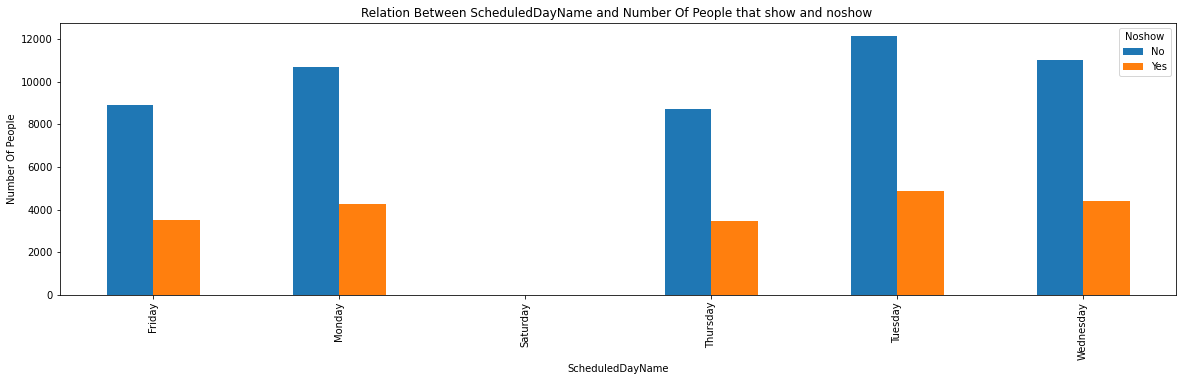

In [298]:
##ScheduledDayName
pd.crosstab(noshow_df['ScheduledDayName'],noshow_df['Noshow']).plot(kind='bar',figsize=(20,5));
plt.ylabel('Number Of People');
plt.title("Relation Between ScheduledDayName and Number Of People that show and noshow ")

Text(0.5, 1.0, 'Relation Between AppointmentDayName and Number Of People that show and noshow ')

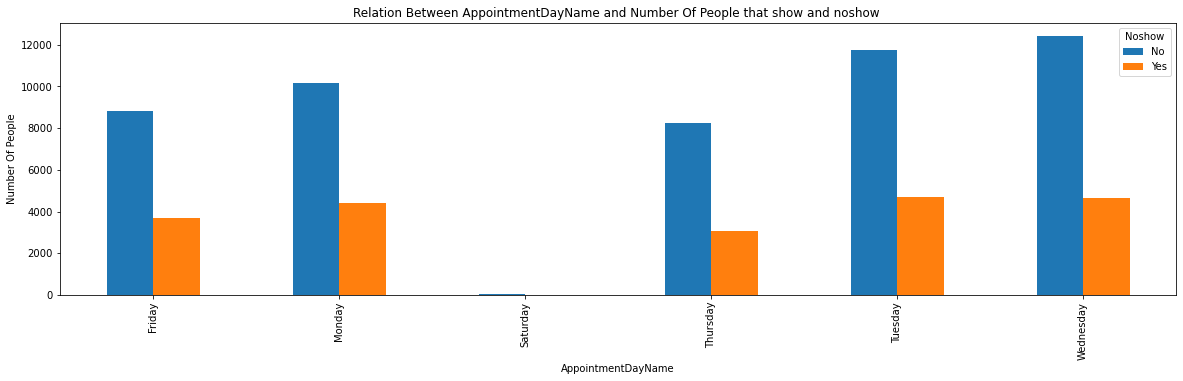

In [297]:
##AppointmentDayName
pd.crosstab(noshow_df['AppointmentDayName'],noshow_df['Noshow']).plot(kind='bar',figsize=(20,5));
## THe higher percentage of appointments are on wednesday highest missed are on monday least missed are on thursday
plt.ylabel('Number Of People');
plt.title("Relation Between AppointmentDayName and Number Of People that show and noshow ")


Text(0.5, 1.0, 'Relation Between ScheduledDayMonth and Number Of People that show and noshow ')

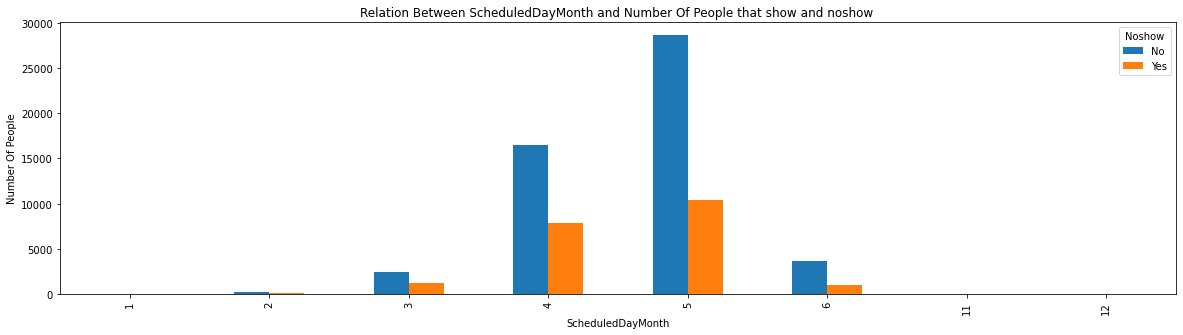

In [296]:
##ScheduledDayMonth
pd.crosstab(noshow_df['ScheduledDayMonth'],noshow_df['Noshow']).plot(kind='bar',figsize=(20,5));
plt.ylabel('Number Of People');
plt.title("Relation Between ScheduledDayMonth and Number Of People that show and noshow ")

Text(0.5, 1.0, 'Relation Between AppointmentDayMonth and Number Of People that show and noshow ')

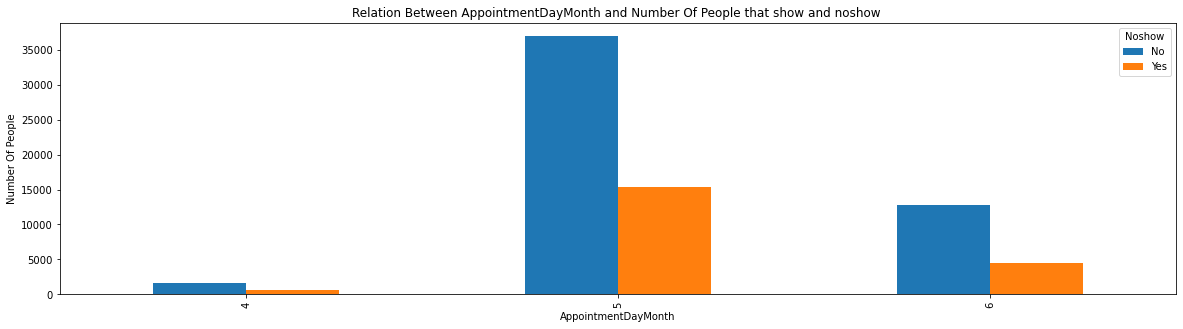

In [295]:
##AppointmentDayMonth
pd.crosstab(noshow_df['AppointmentDayMonth'],noshow_df['Noshow']).plot(kind='bar',figsize=(20,5));
## most appointments are on May
plt.ylabel('Number Of People');
plt.title("Relation Between AppointmentDayMonth and Number Of People that show and noshow ")

Text(0.5, 1.0, 'Relation Between Waiting Interval and Number Of People that show and noshow ')

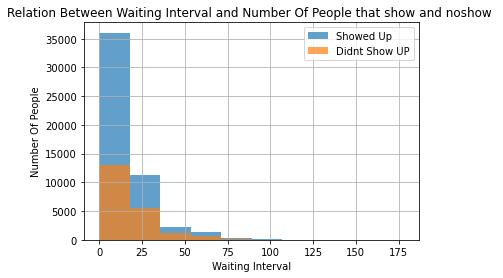

In [294]:
##Waiting Interval
noshow_df.Waiting_Interval[noshow_df['Noshow']=='No'].hist(alpha=0.7,label='Showed Up');
noshow_df.Waiting_Interval[noshow_df['Noshow']=='Yes'].hist(alpha=0.7,label="Didnt Show UP");
plt.legend();
plt.xlabel("Waiting Interval");
plt.ylabel('Number Of People');
plt.title("Relation Between Waiting Interval and Number Of People that show and noshow ")
## most people have their appointment in the same day they Scheduled 



### 7) Neighbourhood

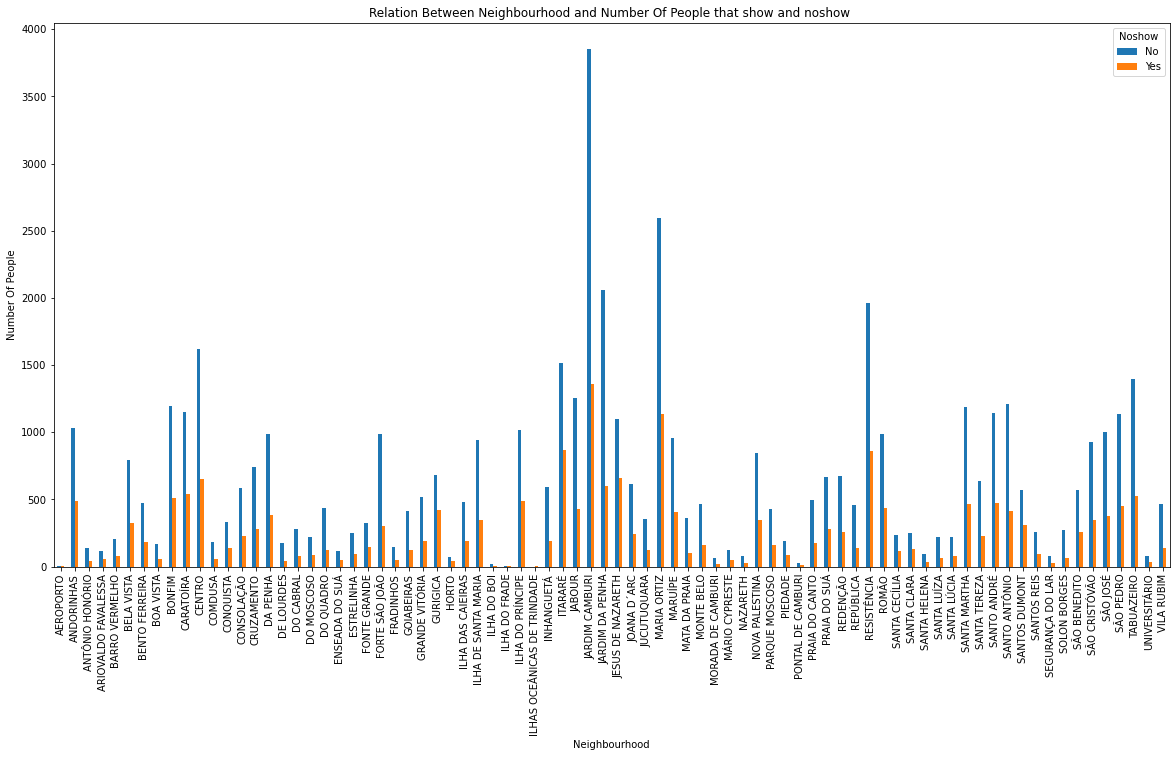

In [293]:
## Neighbourhood
pd.crosstab(noshow_df['Neighbourhood'],noshow_df['Noshow']).plot(kind='bar',figsize=(20,10));
plt.title("Relation Between Neighbourhood and Number Of People that show and noshow ")
plt.ylabel('Number Of People');

<a id='conclusions'></a>
## Conclusions
the only clear diffrence is that most people that show up are at age 60 and least are at age >80 but the number of people
above 80 is low to be used to get a result 
Its clear that Gender doesnt affect people showing up for their appointment

given that percentage of people that didn't show for their appointment is 28 percent  percentage of people that 
percentage of people that have diabetes that didn't show is 24 percent of all people that have diabetes 
while people that has no diabetes that doesnt show represent 28 percent 
so we can deduce that people that has diabetes tend to attend more appointments
given that percentage of people that didn't show for their appointment is 28 percent  percentage of people that 

percentage of people that have Alcoholism that didn't show is 34 percent of all people that have diabetes 
while people that has no Alcoholism that doesnt show represent 28 percent 
so we can deduce that people that has Alcoholism tend to miss more appointments

given that percentage of people that didn't show for their appointment is 28 percent  percentage of people that 
percentage of people that have Hypertension that didn't show is 23 percent of all people that have Hypertension
while people that has no Hypertension that doesnt show represent 29 percent 
so we can deduce that people that has Hypertension tend to attend more appointments 
and who has no Hypertension tend to miss more but on a  very small scale 


given that percentage of people that didn't show for their appointment is 28 percent  percentage of people that 
percentage of people that have Handcap that didn't show is 30 percent of all people that have Handcap
while people that has no Handcap that doesnt show represent 28 percent 
so we can deduce that people that has Handcap tend to miss more appointments but dataset of handcap people is so small 
to be used as an indication 



given that percentage of people that didn't show for their appointment is 28 percent  percentage of people that 
percentage of people that has Scholarship that didn't show is 34 percent of all people that have Scholarship
while people that has no Scholarship that doesnt show represent 27 percent 
so we can deduce that people that has Scholarship tend to miss more appointments 


THe higher percentage of appointments are on wednesday and tuesday and are sheduled on same day 

highest missed are on monday least missed are on thursday

most appointments are on May


most people have their appointment in the same day they Scheduled 


coorleartion between  Neighbourhood and noshow is represented in graph 



### LImitation 
 
There is some features that has very small number so we cannt deduce the effect of the feature on the people this has been shown in the conclusion also the other limitation is that duplicate entries wasnt dealt with in this Analysis 